In [40]:
import source.gprof_log_analysis.gprof_log as gl
import re

ptrn = re.compile(r'^log_(.+).gplog$')
dt = gl.GprofDF('log_RaceHorses_qp22_AI_precise.gplog', 500)

In [ ]:

dt = gl.GprofDF('log_RaceHorses_qp22_AI_precise.gplog', 500, specific_class=('RdCost', ''))
dt

In [7]:
from pathlib import Path
dir_path = 'output_01'
logs = [str(f) for f in Path(dir_path).rglob('*.gplog')]
logs

['output_01/gprof_log/precise/AI/log_RaceHorses_qp32_AI_precise.gplog',
 'output_01/gprof_log/precise/AI/log_RaceHorses_qp22_AI_precise.gplog',
 'output_01/gprof_log/precise/AI/log_RaceHorses_qp27_AI_precise.gplog',
 'output_01/gprof_log/precise/AI/log_RaceHorses_qp37_AI_precise.gplog',
 'output_01/gprof_log/precise/RA/log_RaceHorses_qp37_RA_precise.gplog',
 'output_01/gprof_log/precise/RA/log_RaceHorses_qp27_RA_precise.gplog',
 'output_01/gprof_log/precise/RA/log_RaceHorses_qp32_RA_precise.gplog',
 'output_01/gprof_log/precise/RA/log_RaceHorses_qp22_RA_precise.gplog',
 'output_01/gprof_log/precise/LB/log_RaceHorses_qp32_LB_precise.gplog',
 'output_01/gprof_log/precise/LB/log_RaceHorses_qp22_LB_precise.gplog',
 'output_01/gprof_log/precise/LB/log_RaceHorses_qp37_LB_precise.gplog',
 'output_01/gprof_log/precise/LB/log_RaceHorses_qp27_LB_precise.gplog']

In [36]:

f_list = [
    'xCalcHADs2x2',
    'xCalcHADs4x4',
    'xCalcHADs8x8',
    'xCalcHADs16x8',
    'xCalcHADs8x16',
    'xCalcHADs4x8',
    'xCalcHADs8x4'
]

data = {'log_name': []}
for f in f_list:
    data[f] = []

for log in logs:
    log_data = gl.GprofDF(log, 10000, specific_class=('RdCost', ''))

    data['log_name'].append(log)
    for f in f_list:
        indexOf = log_data[log_data['name'] == f].index.values
        if len(indexOf) != 0:
            data[f].append(log_data['calls'][indexOf[0]])
        else:
            data[f].append(0.0)
import pandas as pd
data = pd.DataFrame(data)
data

,log_name,xCalcHADs2x2,xCalcHADs4x4,xCalcHADs8x8,xCalcHADs16x8,xCalcHADs8x16,xCalcHADs4x8,xCalcHADs8x4
0,output_01/gprof_log/precise/AI/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
1,output_01/gprof_log/precise/AI/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
2,output_01/gprof_log/precise/AI/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
3,output_01/gprof_log/precise/AI/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
4,output_01/gprof_log/precise/RA/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
5,output_01/gprof_log/precise/RA/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
6,output_01/gprof_log/precise/RA/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
7,output_01/gprof_log/precise/RA/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
8,output_01/gprof_log/precise/LB/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0
9,output_01/gprof_log/precise/LB/log_RaceHorses_...,0.0,0.0,0.0,30.0,2.0,134.0,14.0


<BarContainer object of 7 artists>

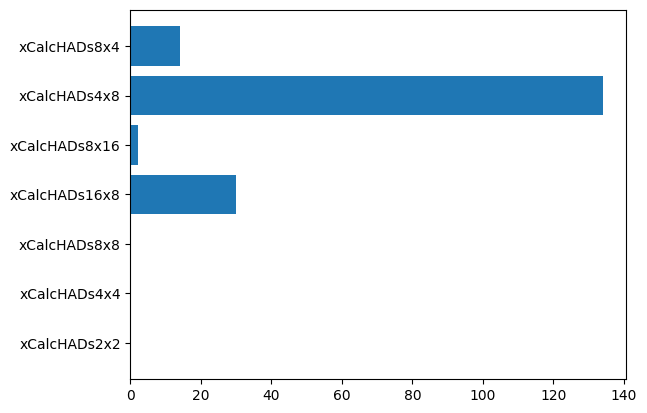

In [35]:
import matplotlib.pyplot as plt

dt = {'name': [], 'value': []}

for d in data.iloc[:,1:]:
    dt['name'].append(d)
    dt['value'].append(data[d].mean())
plt.barh(dt['name'], dt['value'])
